In [0]:
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [31]:
df = pd.read_csv('titanic.csv', error_bad_lines=False, comment='#')
#df.drop(columns='id', inplace = True);
df.drop(columns='Cabin', inplace= True)
for col in df.columns:
    count = df[df[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))
print ('{} - размер датасета'.format(df.shape))


PassengerId  -  0
Survived  -  0
Pclass  -  0
Name  -  0
Sex  -  0
Age  -  177
SibSp  -  0
Parch  -  0
Ticket  -  0
Fare  -  0
Embarked  -  2
(891, 11) - размер датасета


In [32]:
df = df.dropna(axis=0, how='any')
(df.shape)

(712, 11)

In [33]:
#df.drop(columns=['Ticket', 'Name'], inplace= True)
df.reset_index(drop= True, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Закодируем категориальные признаки 

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder()
ohe = OneHotEncoder()
sex = le.fit_transform(df['Sex'])
sex = pd.DataFrame({'Sex':sex.T})
Embarked = le.fit_transform(df['Embarked'])
Embarked = pd.DataFrame({'Embarked' : Embarked.T })
sex


,Sex
0,1
1,0
2,0
3,0
4,1
...,...
707,0
708,1
709,0
710,1


In [35]:
del df['Sex']
del df['Embarked']
df = df.join(sex)
df = df.join(Embarked)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,2
...,...,...,...,...,...,...,...,...,...,...,...
707,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,1
708,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,2
709,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,2
710,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0


In [0]:
df.drop(columns=['Ticket', 'Name'], inplace= True)

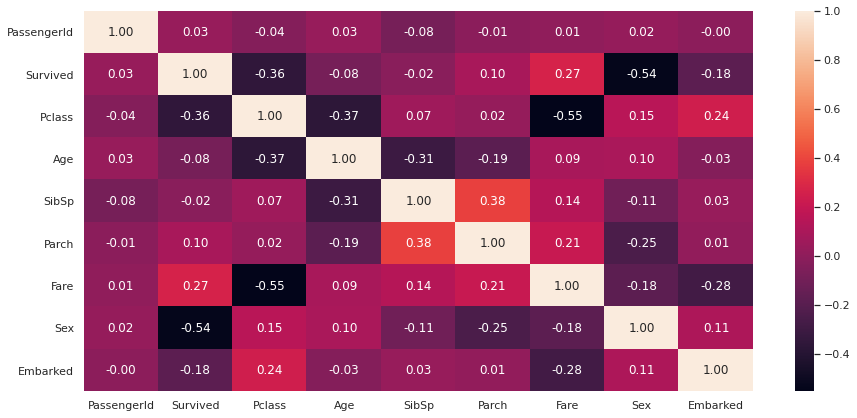

In [43]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [0]:
X = df.drop(columns='Survived')
Y = df.Survived

### Логистическая регрессия

In [0]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=100000)
clf_lr.fit(X_train, y_train)

In [97]:
clf_lr.score(X_train, y_train)

0.8031634446397188

In [76]:
from sklearn.metrics import accuracy_score as acuracy, precision_score as precision, recall_score as recall

print('accuracy_score для обучающего набора:', acuracy(y_train, clf_lr.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, clf_lr.predict(X_test)), '\n')
print('precission_score для обучающего набора:', precision(y_train, clf_lr.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, clf_lr.predict(X_test)), '\n')
print('recall_score для обучающего набора:', recall(y_train, clf_lr.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, clf_lr.predict(X_test)), '\n')

accuracy_score для обучающего набора: 0.8031634446397188
accuracy_score для тестового набора : 0.8181818181818182 

precission_score для обучающего набора: 0.7788461538461539
precission_score для тестового набора : 0.8148148148148148 

recall_score для обучающего набора: 0.7105263157894737
recall_score для тестового набора : 0.7333333333333333 



# SVM

In [77]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf', C=1)
%time clf_svc.fit(X_train, y_train)

CPU times: user 17.6 ms, sys: 6 µs, total: 17.6 ms
Wall time: 22.2 ms


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
print('accuracy_score tдля обучающего набораrain:', acuracy(y_train, clf_svc.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, clf_svc.predict(X_test)), '\n')
print('precission_score для обучающего набора:', precision(y_train, clf_svc.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, clf_svc.predict(X_test)), '\n')
print('recall_score для обучающего набора:', recall(y_train, clf_svc.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, clf_svc.predict(X_test)), '\n')

accuracy train: 0.6467486818980668
accuracy test : 0.6293706293706294 

precission train: 0.8
precission test : 0.7692307692307693 

recall train: 0.15789473684210525
recall test : 0.16666666666666666 



# Деревья решений

In [102]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=25, min_samples_split=2, min_samples_leaf=1)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
print('accuracy_score для обучающего набора:', acuracy(y_train, clf_dt.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, clf_dt.predict(X_test)), '\n')
print('precission_score для обучающего набора:', precision(y_train, clf_dt.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, clf_dt.predict(X_test)), '\n')
print('recall_score для обучающего набора:', recall(y_train, clf_dt.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, clf_dt.predict(X_test)), '\n')

accuracy_score для обучающего набора: 1.0
accuracy_score для тестового набора : 0.7342657342657343 

precission_score для обучающего набора: 1.0
precission_score для тестового набора : 0.6896551724137931 

recall_score для обучающего набора: 1.0
recall_score для тестового набора : 0.6666666666666666 



# GridSearchCV

### Используем функцию GridSearchCV для подбора гиперпараметров 

In [0]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
params_l = {'max_iter' : [50000], 'C' : [x for x in 10.0**np.arange(-5, 5)]}
grsrch_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=params_l, cv=KFold(random_state=1, shuffle=True))

In [85]:
grsrch_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0],
                         'max_iter': [50000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
grsrch_lr.best_params_

{'C': 1.0, 'max_iter': 50000}

In [87]:
print('accuracy_score для обучаещего набора:', acuracy(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')
print('precission_score для обучаещего набора:', precision(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')
print('recall_score для обучаещего набора:', recall(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')


accuracy_score для обучаещего набора: 0.8031634446397188
accuracy_score для тестового набора : 0.8181818181818182 

precission_score для обучаещего набора: 0.7788461538461539
precission_score для тестового набора : 0.8148148148148148 

recall_score для обучаещего набора: 0.7105263157894737
recall_score для тестового набора : 0.7333333333333333 



In [0]:
params_svc = {'kernel' : ['linear', 'poly']}
grsrch_svc = GridSearchCV(estimator=SVC(), param_grid=params_svc, cv=KFold(n_splits=5, random_state=1, shuffle=True))

In [89]:
grsrch_svc.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [90]:
print('accuracy_score для обучающего набора:', acuracy(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')
print('precission_score для обучающего набора:', precision(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')
print('recall_score для обучающего набора:', recall(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')

accuracy_score для обучающего набора: 0.7908611599297012
accuracy_score для тестового набора : 0.7762237762237763 

precission_score для обучающего набора: 0.7738693467336684
precission_score для тестового набора : 0.7592592592592593 

recall_score для обучающего набора: 0.6754385964912281
recall_score для тестового набора : 0.6833333333333333 



In [0]:
params_dt = {'max_depth' : np.arange(10, 20, 2), 
             'min_samples_split' : np.arange(2, 8, 1)}

grsrch_dt =  GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_dt, cv=KFold(n_splits=5, random_state=1, shuffle=True))

In [92]:
grsrch_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_

In [93]:
print('accuracy_score для обучающего набора:', acuracy(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('accuracy_score для тестового набора :', acuracy(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')
print('precission_score для обучающего набора:', precision(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('precission_score для тестового набора :', precision(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')
print('recall_score для обучающего набора:', recall(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('recall_score для тестового набора :', recall(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')

accuracy_score для обучающего набора: 0.9824253075571178
accuracy_score для тестового набора : 0.7412587412587412 

precission_score для обучающего набора: 1.0
precission_score для тестового набора : 0.7090909090909091 

recall_score для обучающего набора: 0.956140350877193
recall_score для тестового набора : 0.65 



### Как видно из значений метрик качества, после примения метода GridSearchCV значения качество модели улучшилось 

In [0]:
def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=3)
    regr_2 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()

In [0]:
Image(get_png_tree(boston_tree_regr, df_boston.columns), height="500")